In [27]:
# !pip install pandas

In [29]:
# !pip install matplotlib

In [51]:
# !pip install seaborn

In [9]:
import pandas as pd

data = {
    'x1': [0, 1, 0, 1],
    'x2': [0, 0, 0, 1],
    'y': [1, 1, 1, 0]
}

df = pd.DataFrame.from_dict(data).astype('int')
X = df[['x1', 'x2']].values
y = df['y'].values

In [10]:
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,0,1
3,1,1,0


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# this is our perceptron from Monday's by-hand:
model = Sequential()
model.add(Dense(
    1, # use only 1 unit/neuron for building a perception
    input_dim=2, # implicitly define our input layer by specifying the number of dimes
    activation='sigmoid' # select our activation/nonlinear function
))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y,epochs=5) # epochs: number of times to train on the entire dataset

Epoch 1/5
1/1 [==============================] - 0s 243ms/step - loss: 0.6584 - accuracy: 0.2500
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.7500
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7500
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.7500
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.7500


In [17]:
# evaluate the model
scores = model.evaluate(X, y)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

1/1 [==============================] - 0s 73ms/step - loss: 0.6557 - accuracy: 0.7500
accuracy: 75.0


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_2_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [30]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [24]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [25]:
X_train[0].shape

(28, 28)

5


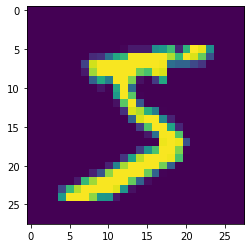

In [31]:
plt.imshow(X_train[0])
print(y_train[0])

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
# rank 3 tensor data obj
X_test.shape

(10000, 28, 28)

In [36]:
# X variable types
max_value = 255
X_train = X_train.astype('float32') / max_value
X_test = X_test.astype('float32') / max_value

In [39]:
# reshape the date, i.e flatten the 2d images into row vectors
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [40]:
model = Sequential()

model.add(
    # hidden layer
    # our hidden layer has 32 neurons in it
    Dense(32, activation='relu', input_dim=784)
)
# relu, soft relu, leaky relu
model.add(
    # output layer, specify the number of labels to predict, here that is 10
    Dense(10, activation='softmax')
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
results = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.3588 - accuracy: 0.8996 - val_loss: 0.2268 - val_accuracy: 0.9334
Epoch 2/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.1943 - accuracy: 0.9434 - val_loss: 0.1770 - val_accuracy: 0.9472
Epoch 3/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.1518 - accuracy: 0.9561 - val_loss: 0.1472 - val_accuracy: 0.9568
Epoch 4/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.1257 - accuracy: 0.9623 - val_loss: 0.1243 - val_accuracy: 0.9628
Epoch 5/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.1079 - accuracy: 0.9685 - val_loss: 0.1178 - val_accuracy: 0.9660


/Users/jeffkang/opt/anaconda3/envs/sprint4-unit2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jeffkang/opt/anaconda3/envs/sprint4-unit2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

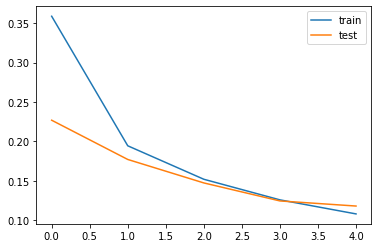

In [53]:
import seaborn as sns

epochs = [i for i in range(len(results.history['loss']))]
sns.lineplot(epochs, results.history['loss'], label='train')
sns.lineplot(epochs, results.history['val_loss'], label='test')

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 548us/step - loss: 0.1178 - accuracy: 0.9660


[0.11784800887107849, 0.9660000205039978]

In [59]:
%reload_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [60]:
model = Sequential()

model.add(
    # hidden layer 1
    Dense(32, activation='relu', input_dim=784)
)

model.add(
    Dense(10, activation='softmax')
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.3552 - accuracy: 0.9001 - val_loss: 0.2190 - val_accuracy: 0.9350
Epoch 2/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.1955 - accuracy: 0.9438 - val_loss: 0.1642 - val_accuracy: 0.9520
Epoch 3/5
1875/1875 [==============================] - 2s 835us/step - loss: 0.1537 - accuracy: 0.9550 - val_loss: 0.1481 - val_accuracy: 0.9550
Epoch 4/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.1293 - accuracy: 0.9620 - val_loss: 0.1448 - val_accuracy: 0.9562
Epoch 5/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.1118 - accuracy: 0.9658 - val_loss: 0.1215 - val_accuracy: 0.9632


In [63]:
%tensorboard --logdir logs

In [65]:
model = Sequential()

model.add(
    Dense(32, activation='relu', input_dim=784)
)

model.add(
    Dense(32, activation='relu')
)

model.add(
    Dense(10, activation='softmax')
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

results = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 948us/step - loss: 0.3519 - accuracy: 0.8965 - val_loss: 0.2051 - val_accuracy: 0.9378
Epoch 2/5
1875/1875 [==============================] - 2s 892us/step - loss: 0.1754 - accuracy: 0.9477 - val_loss: 0.1555 - val_accuracy: 0.9548
Epoch 3/5
1875/1875 [==============================] - 2s 884us/step - loss: 0.1379 - accuracy: 0.9590 - val_loss: 0.1419 - val_accuracy: 0.9558
Epoch 4/5
1875/1875 [==============================] - 2s 892us/step - loss: 0.1133 - accuracy: 0.9658 - val_loss: 0.1261 - val_accuracy: 0.9626
Epoch 5/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.0987 - accuracy: 0.9697 - val_loss: 0.1193 - val_accuracy: 0.9641


In [68]:
model = Sequential()
model.add(Dense(32, activation='sigmoid',input_dim=784))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9338 - accuracy: 0.7376 - val_loss: 0.3782 - val_accuracy: 0.8996
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.9191 - val_loss: 0.2409 - val_accuracy: 0.9323
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2092 - accuracy: 0.9409 - val_loss: 0.1884 - val_accuracy: 0.9481
Epoch 4/5
1875/1875 [==============================] - 2s 1000us/step - loss: 0.1700 - accuracy: 0.9518 - val_loss: 0.1662 - val_accuracy: 0.9525
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1458 - accuracy: 0.9581 - val_loss: 0.1544 - val_accuracy: 0.9555


In [69]:
model = Sequential()
model.add(
    Dense(32, activation='relu', input_dim=784)
)
model.add(
    Dense(32, activation='relu')
)
model.add(
    Dense(10, activation='softmax')
)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.7844 - accuracy: 0.7821 - val_loss: 0.3600 - val_accuracy: 0.8969
Epoch 2/5
1875/1875 [==============================] - 1s 786us/step - loss: 0.3316 - accuracy: 0.9043 - val_loss: 0.2840 - val_accuracy: 0.9183
Epoch 3/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.2754 - accuracy: 0.9211 - val_loss: 0.2471 - val_accuracy: 0.9275
Epoch 4/5
1875/1875 [==============================] - 1s 742us/step - loss: 0.2401 - accuracy: 0.9313 - val_loss: 0.2226 - val_accuracy: 0.9357
Epoch 5/5
1875/1875 [==============================] - 1s 748us/step - loss: 0.2158 - accuracy: 0.9386 - val_loss: 0.2000 - val_accuracy: 0.9435
